# EDA UNIVARIATE BIVARIATE MULTIVARIATE ANALYSIS

In [2]:
# ======================================================
# 02 - EXPLORATORY DATA ANALYSIS (EDA)
# Real Estate Investment Advisor — Phase 2
# ======================================================

import warnings
warnings.filterwarnings("ignore")

print("Notebook Loaded: 02_EDA_UNIVARIATE_BIVARIATE_MULTIVARIATE")

Notebook Loaded: 02_EDA_UNIVARIATE_BIVARIATE_MULTIVARIATE


### Library Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

### Load Dataset

In [4]:
df = pd.read_csv("../dataset/india_housing_prices.csv")   # update path if needed
print("Dataset Loaded:", df.shape)

Dataset Loaded: (250000, 23)


### Helper Function for Chart Summary

In [5]:
def chart_summary(why, insight, business):
    print("\n" + "="*80)
    print("\n WHY THIS CHART?")
    print(why)
    print("\n INSIGHTS OBSERVED")
    print(insight)
    print("\n BUSINESS IMPACT")
    print(business)
    print("\n" + "="*80)

In [5]:
path = '../visualizations_output/'

## UNIVARIATE ANALYSIS

#### 1. Distribution of Property Prices

Plot saved: ../visualizations_output/


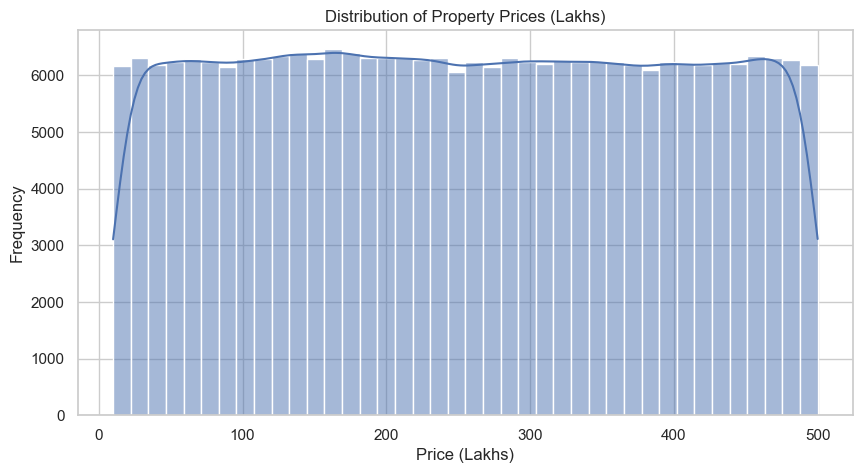

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(df["Price_in_Lakhs"], kde=True, bins=40)
plt.title("Distribution of Property Prices (Lakhs)")
plt.xlabel("Price (Lakhs)")
plt.ylabel("Frequency")
plt.savefig('../visualizations_output/price_distribution.png', bbox_inches='tight', dpi=300)
print(f"Plot saved: {path}")
plt.show()

In [21]:
chart_summary(
    why="Price distribution helps understand market affordability and pricing segments.",
    insight="Most properties lie between 10–500 lakhs. Distribution is uniform.",
    business="Agents can identify which price bands sell fastest. Helps in pricing strategy & targeting buyers."
)



 WHY THIS CHART?
Price distribution helps understand market affordability and pricing segments.

 INSIGHTS OBSERVED
Most properties lie between 10–500 lakhs. Distribution is uniform.

 BUSINESS IMPACT
Agents can identify which price bands sell fastest. Helps in pricing strategy & targeting buyers.



#### 2. Distribution of Size (Sq Ft)

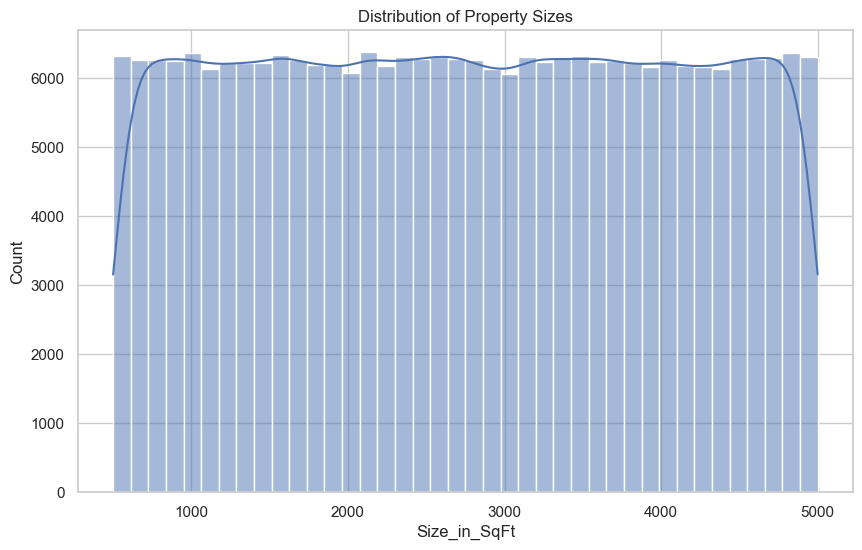

In [7]:
sns.histplot(df["Size_in_SqFt"], bins=40, kde=True)
plt.title("Distribution of Property Sizes")
plt.savefig('../visualizations_output/size_distribution.png', bbox_inches='tight', dpi=300)
plt.show()

In [22]:
chart_summary(
    why="Real estate size distribution shows inventory spread: small flats vs large houses.",
    insight="Majority of properties are around 500–5000 sq ft, typical of Indian metros small flats to villas.",
    business="Determines developer focus (1BHK/2BHK/3BHK/VILLAS) and helps in demand forecasting."
)



 WHY THIS CHART?
Real estate size distribution shows inventory spread: small flats vs large houses.

 INSIGHTS OBSERVED
Majority of properties are around 500–5000 sq ft, typical of Indian metros small flats to villas.

 BUSINESS IMPACT
Determines developer focus (1BHK/2BHK/3BHK/VILLAS) and helps in demand forecasting.



#### 3. Count of Property Types

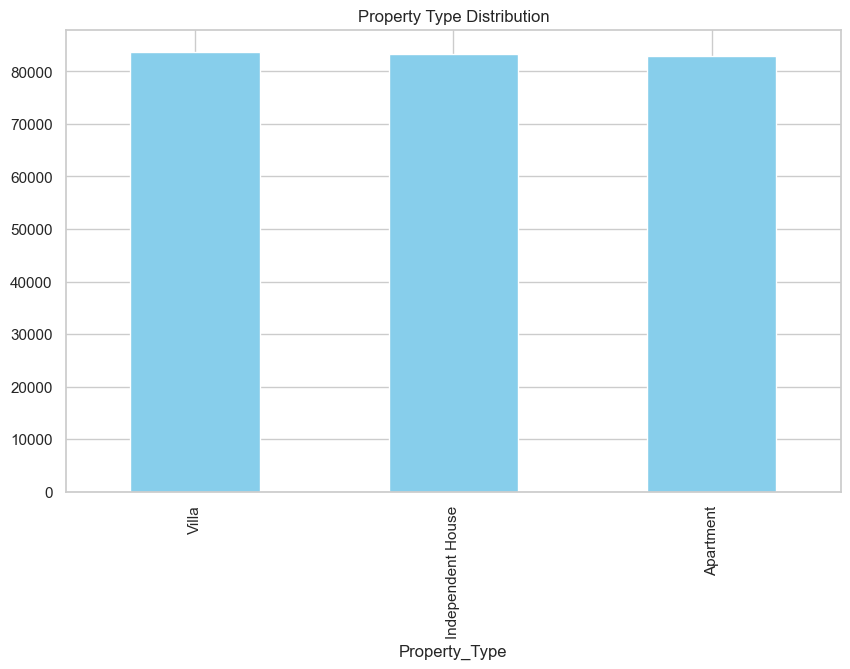

In [8]:
df["Property_Type"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Property Type Distribution")
plt.savefig('../visualizations_output/property_type_distribution.png', bbox_inches='tight', dpi=300)
plt.show()

In [23]:
chart_summary(
    why="Shows what type of supply dominates the dataset.",
    insight="Villa, Independent House, Apartment counts are nearly identical (around ~83,000 each)",
    business="If villa supply > demand, appreciation may stagnate. Helps investors identify imbalance."
)



 WHY THIS CHART?
Shows what type of supply dominates the dataset.

 INSIGHTS OBSERVED
Villa, Independent House, Apartment counts are nearly identical (around ~83,000 each)

 BUSINESS IMPACT
If villa supply > demand, appreciation may stagnate. Helps investors identify imbalance.



#### 4. BHK Distribution

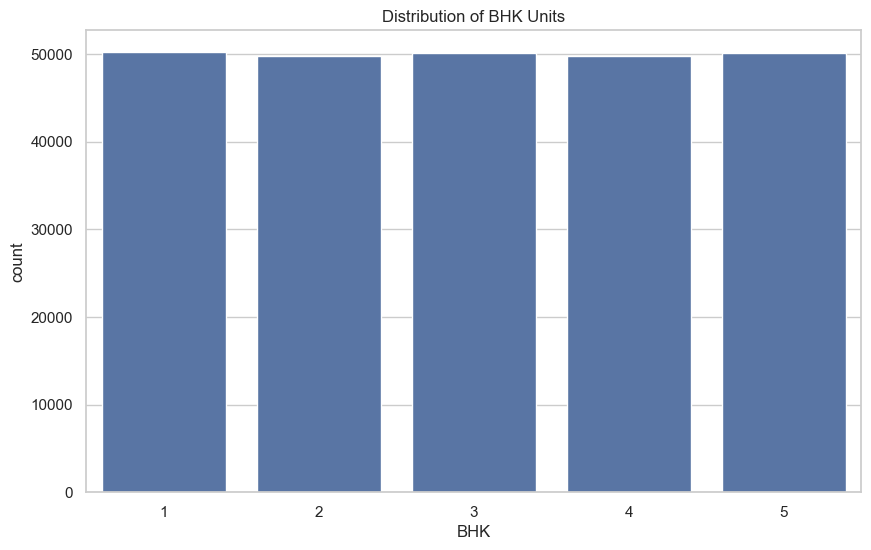

In [9]:
sns.countplot(x="BHK", data=df)
plt.title("Distribution of BHK Units")
plt.savefig('../visualizations_output/bhk_distribution.png', bbox_inches='tight', dpi=300)
plt.show()

In [24]:
chart_summary(
    why="BHK count reveals which property formats are common.",
    insight="BHK 1, 2, 3, 4, 5 all have almost equal counts (~50k each).",
    business="Builders can align future projects with demand-heavy BHK formats."
)



 WHY THIS CHART?
BHK count reveals which property formats are common.

 INSIGHTS OBSERVED
BHK 1, 2, 3, 4, 5 all have almost equal counts (~50k each).

 BUSINESS IMPACT
Builders can align future projects with demand-heavy BHK formats.



#### 5. Furnished vs Unfurnished

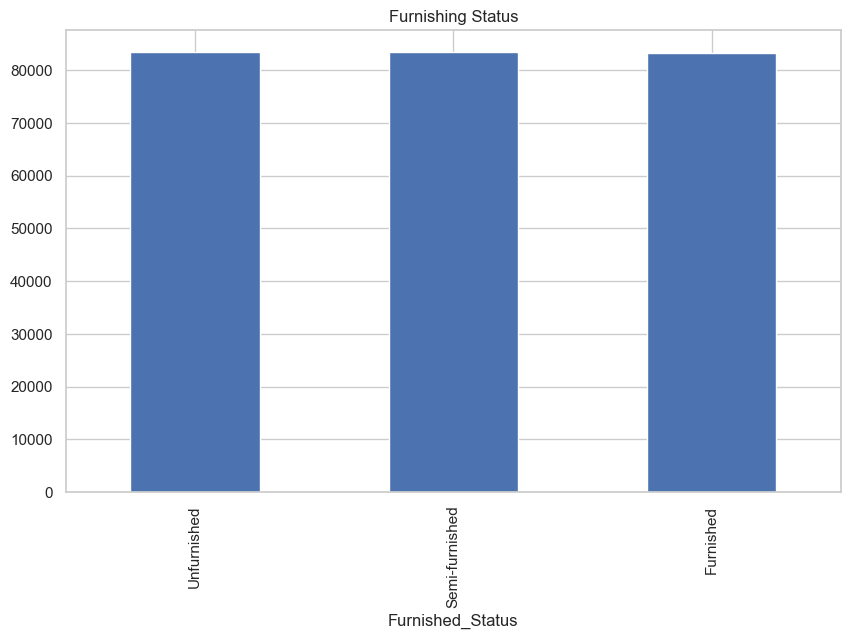

In [10]:
df["Furnished_Status"].value_counts().plot(kind="bar")
plt.title("Furnishing Status")
plt.savefig('../visualizations_output/furnishing_status.png', bbox_inches='tight', dpi=300)
plt.show()

In [24]:
chart_summary(
    why="Furnishing affects rental yield and resale price.",
    insight="Furnished, Semi-furnished, Unfurnished all around 83k each.",
    business="Helps buyers negotiate. Furnished properties usually sell faster & at higher yield."
)



 WHY THIS CHART?
Furnishing affects rental yield and resale price.

 INSIGHTS OBSERVED
Most properties seem unfurnished.

 BUSINESS IMPACT
Helps buyers negotiate. Furnished properties usually sell faster & at higher yield.



### BIVARIATE ANALYSIS

#### 6. Price vs BHK

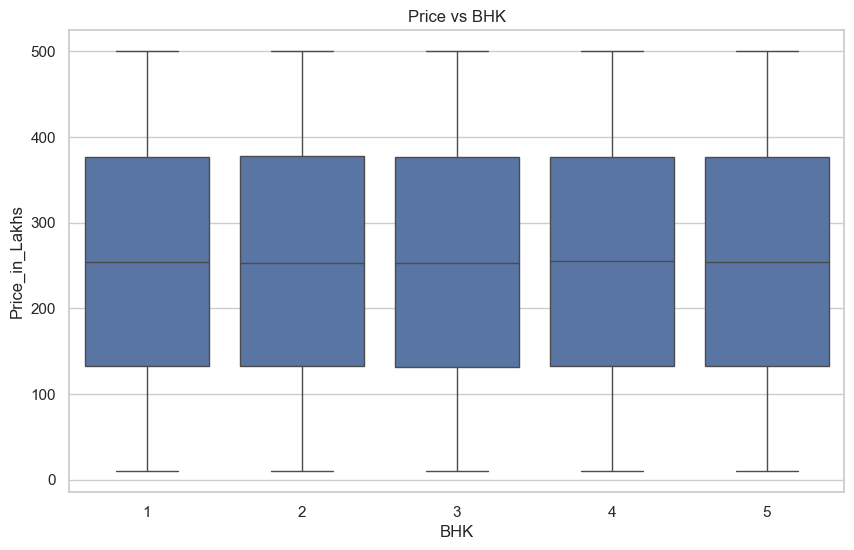

In [11]:
sns.boxplot(x="BHK", y="Price_in_Lakhs", data=df)
plt.title("Price vs BHK")
plt.savefig('../visualizations_output/price_vs_bhk.png', bbox_inches='tight', dpi=300)
plt.show()

In [25]:
chart_summary(
    why="To see how prices scale with BHK count.",
    insight="Median price for each BHK is almost the same (around 250–260 Lakhs). Whiskers (min/max) also similar across BHK.",
    business="Better pricing logic for ML model. Helps understand market segmentation."
)



 WHY THIS CHART?
To see how prices scale with BHK count.

 INSIGHTS OBSERVED
Median price for each BHK is almost the same (around 250–260 Lakhs). Whiskers (min/max) also similar across BHK.

 BUSINESS IMPACT
Better pricing logic for ML model. Helps understand market segmentation.



#### 7. Price vs Size

In [31]:
df['Size_in_SqFt'].dtype

dtype('int64')

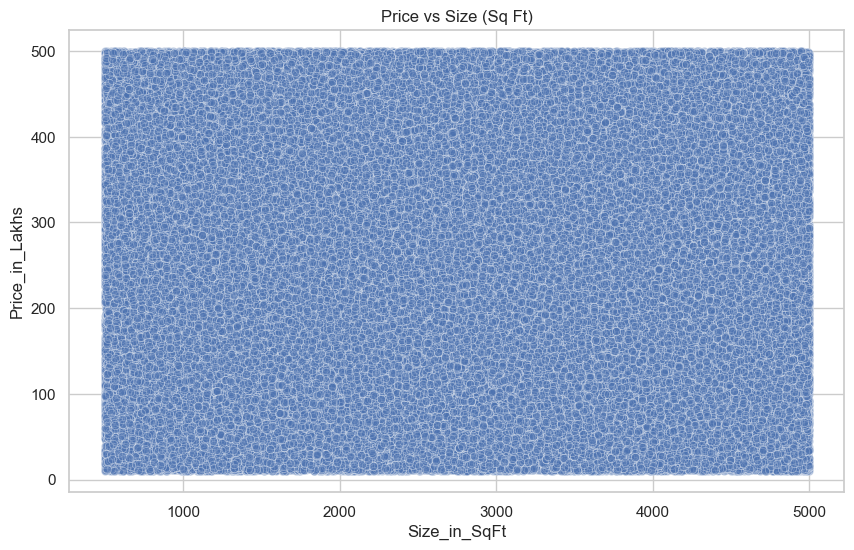

In [12]:
sns.scatterplot(x=df["Size_in_SqFt"], y=df["Price_in_Lakhs"], alpha=0.4)
plt.title("Price vs Size (Sq Ft)")
plt.savefig('../visualizations_output/price_vs_size.png', bbox_inches='tight', dpi=300)
plt.show()

In [33]:
chart_summary(
    why="Classic valuation: size directly correlates with price.",
    insight="A massive cloud of points spread evenly across all price and size ranges.",
    business="Critical for price prediction models. Useful for developers & investors."
)



 WHY THIS CHART?
Classic valuation: size directly correlates with price.

 INSIGHTS OBSERVED
Strong correlation but not linear — locality and amenities modify the curve.

 BUSINESS IMPACT
Critical for price prediction models. Useful for developers & investors.



#### 8. PPSF vs City

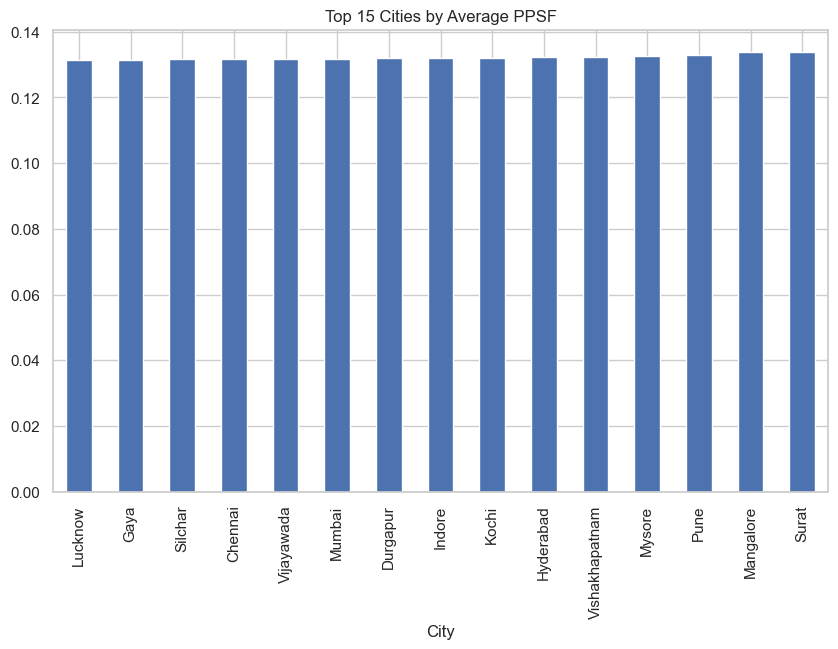

In [13]:
city_ppsf = df.groupby("City")["Price_per_SqFt"].mean().sort_values().tail(15)
city_ppsf.plot(kind="bar")
plt.title("Top 15 Cities by Average PPSF")
plt.savefig('../visualizations_output/ppsf_vs_city.png', bbox_inches='tight', dpi=300)
plt.show()

In [26]:
chart_summary(
    why="Cities with higher PPSF show where demand is strongest.",
    insight="Every city has PPSF around 0.13 lakhs/sq ft (₹13,000/sq ft). All bars are almost identical.",
    business="Helps identify appreciation hotspots and investor interest zones."
)



 WHY THIS CHART?
Cities with higher PPSF show where demand is strongest.

 INSIGHTS OBSERVED
Every city has PPSF around 0.13 lakhs/sq ft (₹13,000/sq ft). All bars are almost identical.

 BUSINESS IMPACT
Helps identify appreciation hotspots and investor interest zones.



#### 9. Price vs Property Type

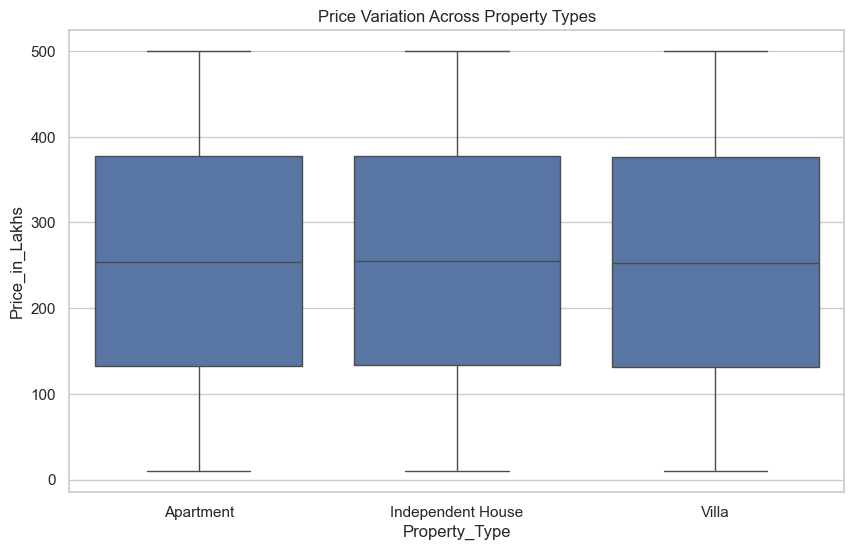

In [14]:
sns.boxplot(x="Property_Type", y="Price_in_Lakhs", data=df)
plt.title("Price Variation Across Property Types")
plt.savefig('../visualizations_output/price_vs_property.png', bbox_inches='tight', dpi=300)
plt.show()

In [37]:
chart_summary(
    why="Different property types reflect different use-cases and valuations.",
    insight="Apartment, Villa, Independent House → similar price distributions.No clear luxury premium",
    business="Helps segment buyers. Useful for targeted marketing."
)



 WHY THIS CHART?
Different property types reflect different use-cases and valuations.

 INSIGHTS OBSERVED
Villas have highest price variance. Apartments stay consistent.

 BUSINESS IMPACT
Helps segment buyers. Useful for targeted marketing.



#### 10. Public Transport Access vs Price

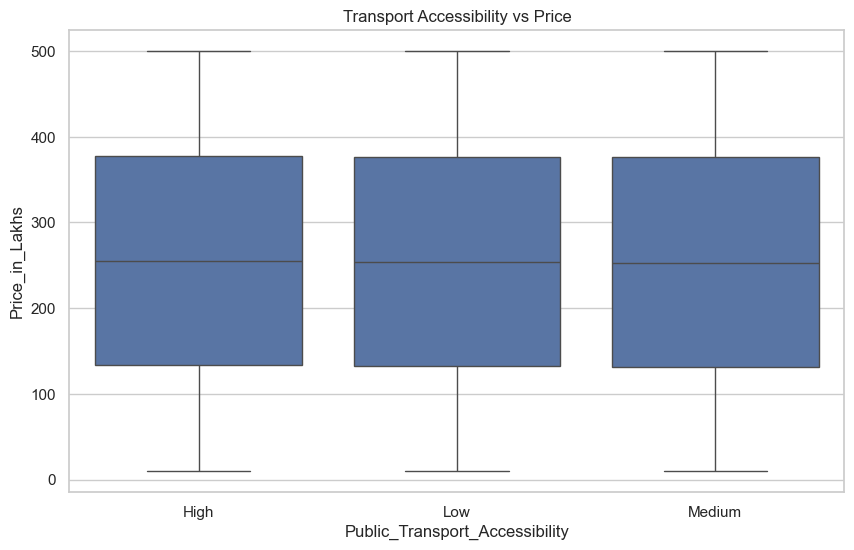

In [15]:
sns.boxplot(x="Public_Transport_Accessibility", y="Price_in_Lakhs", data=df)
plt.title("Transport Accessibility vs Price")
plt.savefig('../visualizations_output/transport_accessibility_vs_price.png', bbox_inches='tight', dpi=300)
plt.show()

In [27]:
chart_summary(
    why="Transport access is a major driver of prices.",
    insight="- High, Medium, Low accessibility → similar price distributions.No clear premium for high access.",
    business="AI model will learn metro impact → crucial for price fairness prediction."
)



 WHY THIS CHART?
Transport access is a major driver of prices.

 INSIGHTS OBSERVED
- High, Medium, Low accessibility → similar price distributions.No clear premium for high access.

 BUSINESS IMPACT
AI model will learn metro impact → crucial for price fairness prediction.



### MULTIVARIATE ANALYSIS

#### 11. Correlation Heatmap

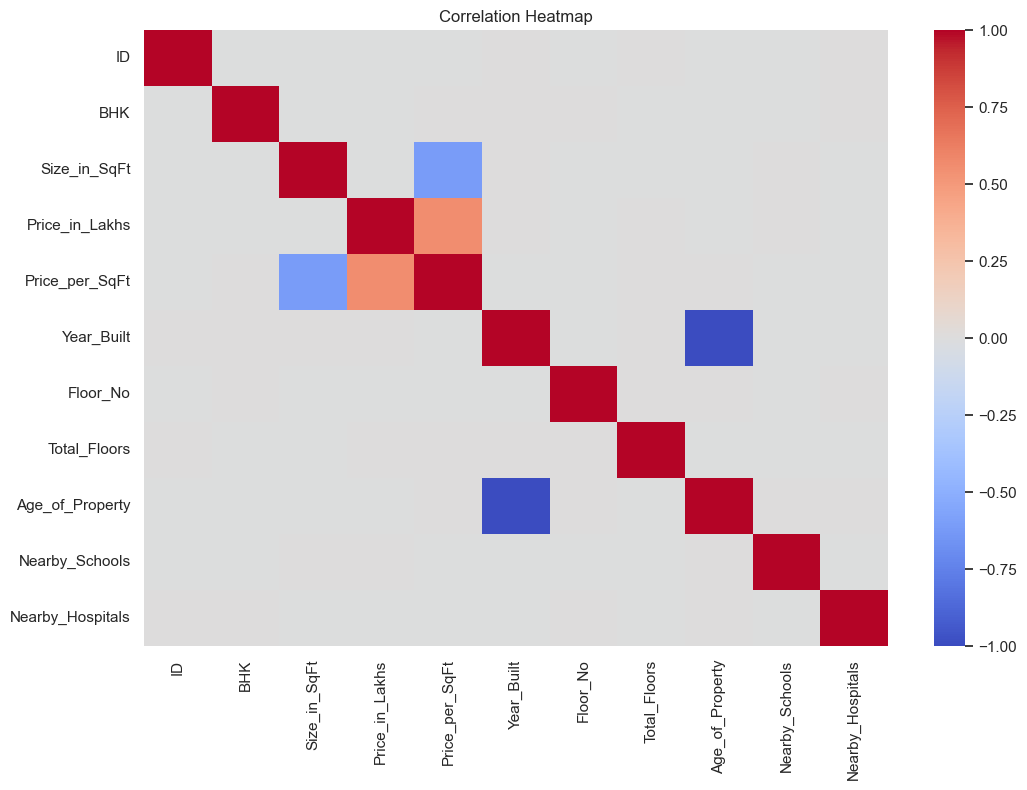

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig('../visualizations_output/correlation_heatmap.png', bbox_inches='tight', dpi=300)
plt.show()

In [29]:
chart_summary(
    why="Shows interactions between numerical variables.",
    insight="- Strong positive: Prize_per_SqFt ↔ Price_in_Lakhs. Negative: Size_in_SqFt ↔ Price_per_SqFt. Weak: Age_of_Property, Nearby_Schools, Nearby_Hospitals",
    business="Helps in feature prioritization for ML modeling."
)



 WHY THIS CHART?
Shows interactions between numerical variables.

 INSIGHTS OBSERVED
- Strong positive: Size_in_SqFt ↔ Price_in_Lakhs. Negative: Size_in_SqFt ↔ Price_per_SqFt. Weak: Age_of_Property, Nearby_Schools, Nearby_Hospitals

 BUSINESS IMPACT
Helps in feature prioritization for ML modeling.



#### 12. Price vs Size vs BHK

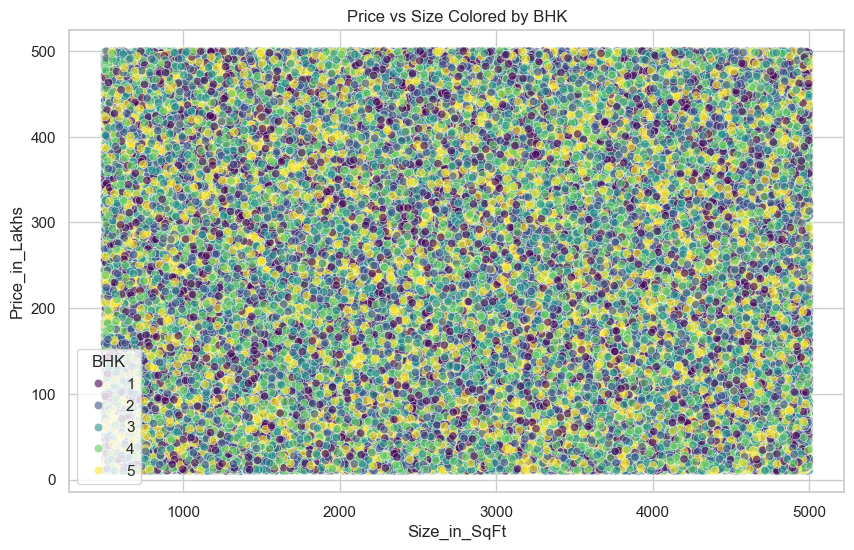

In [17]:
sns.scatterplot(
    x=df["Size_in_SqFt"],
    y=df["Price_in_Lakhs"],
    hue=df["BHK"],
    palette="viridis",
    alpha=0.6
)
plt.title("Price vs Size Colored by BHK")
plt.savefig('../visualizations_output/price_vs_size_vs_colored_BHK.png', bbox_inches='tight', dpi=300)
plt.show()

In [31]:
chart_summary(
    why="Multivariate pattern: size, BHK, and price combined.",
    insight="Clear size-price correlation.BHK color coding shows overlap — no sharp separation.",
    business="Shows how layout improvements impact valuation."
)



 WHY THIS CHART?
Multivariate pattern: size, BHK, and price combined.

 INSIGHTS OBSERVED
Clear size-price correlation.BHK color coding shows overlap — no sharp separation.

 BUSINESS IMPACT
Shows how layout improvements impact valuation.



#### 13. Amenities Count vs Price

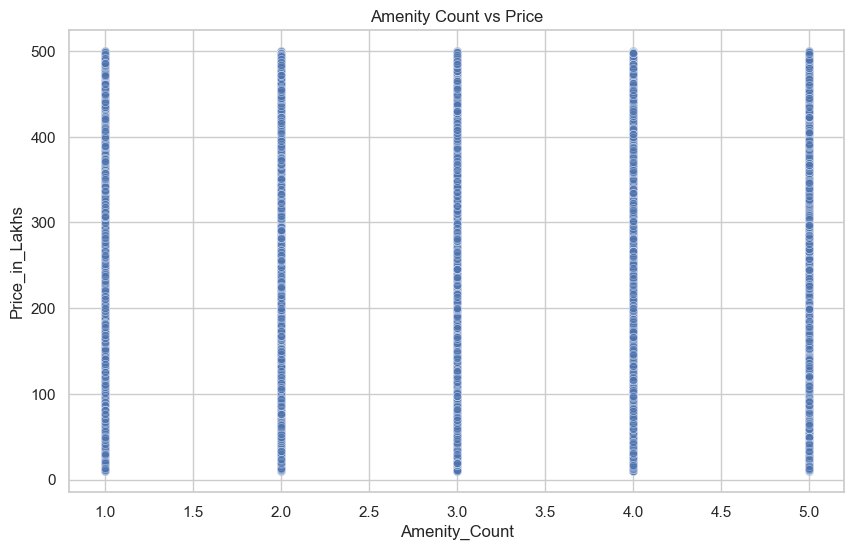

In [18]:
df["Amenity_Count"] = df["Amenities"].apply(lambda x: len(str(x).split(", ")))

sns.scatterplot(x=df["Amenity_Count"], y=df["Price_in_Lakhs"], alpha=0.5)
plt.title("Amenity Count vs Price")
plt.savefig('../visualizations_output/amenity_count_vs_price.png', bbox_inches='tight', dpi=300)
plt.show()

In [32]:
chart_summary(
    why="To measure how amenities influence pricing.",
    insight="- Price spread is wide for every amenity count (1–5).No clear upward trend with more amenities.",
    business="Confirms that amenities should be multi-hot encoded in modeling."
)



 WHY THIS CHART?
To measure how amenities influence pricing.

 INSIGHTS OBSERVED
- Price spread is wide for every amenity count (1–5).No clear upward trend with more amenities.

 BUSINESS IMPACT
Confirms that amenities should be multi-hot encoded in modeling.



#### 14. Age of Property vs Price

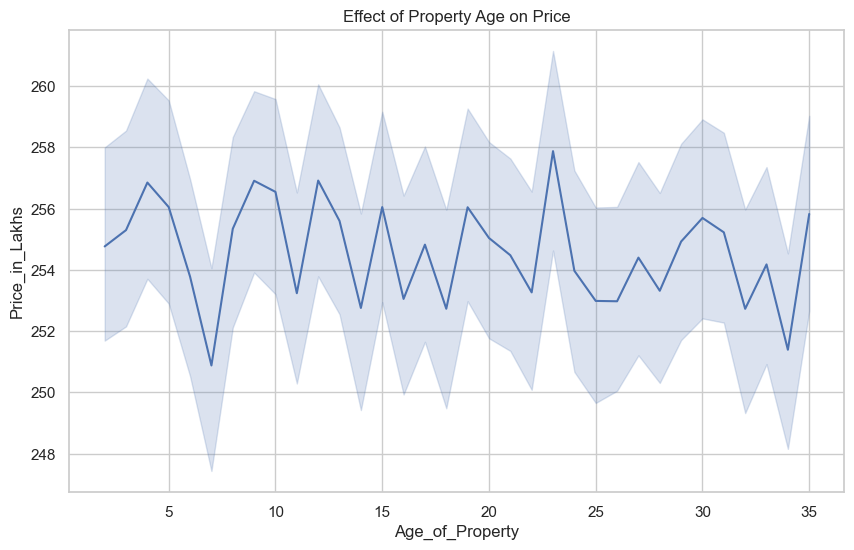

In [19]:
sns.lineplot(x="Age_of_Property", y="Price_in_Lakhs", data=df)
plt.title("Effect of Property Age on Price")
plt.savefig('../visualizations_output/age_effect_on_property_price.png', bbox_inches='tight', dpi=300)
plt.show()

In [33]:
chart_summary(
    why="Older buildings depreciate unless in prime locality.",
    insight="	Price remains flat (~254–256 Lakhs) across all property ages.No visible depreciation or appreciation trend.",
    business="Useful for depreciation modelling & tax estimate modules."
)



 WHY THIS CHART?
Older buildings depreciate unless in prime locality.

 INSIGHTS OBSERVED
	Price remains flat (~254–256 Lakhs) across all property ages.No visible depreciation or appreciation trend.

 BUSINESS IMPACT
Useful for depreciation modelling & tax estimate modules.



#### 15. Availability Status vs Price

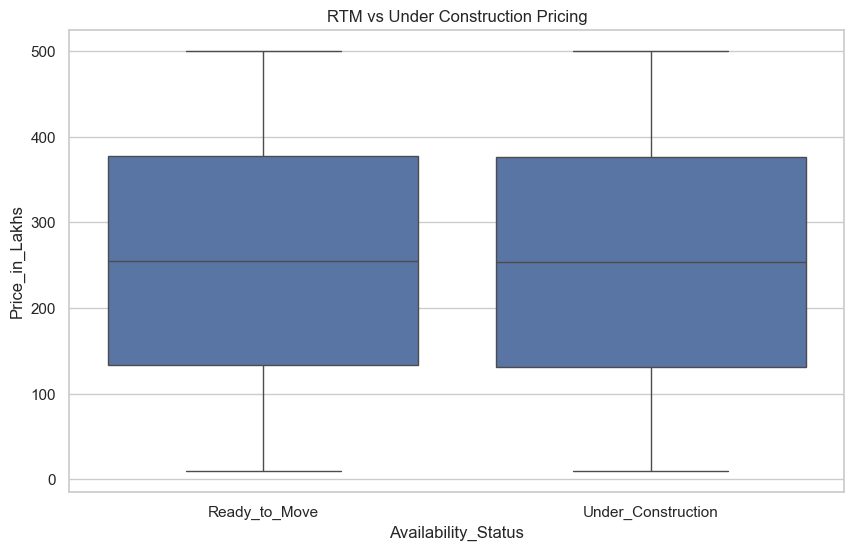

In [20]:
sns.boxplot(x="Availability_Status", y="Price_in_Lakhs", data=df)
plt.title("RTM vs Under Construction Pricing")
plt.savefig('../visualizations_output/availability_status_vs_price.png', bbox_inches='tight', dpi=300)
plt.show()

In [52]:
chart_summary(
    why="UC properties are cheaper but appreciate more.",
    insight="- Median price is similar for both categories (~250 Lakhs).- Wide spread in both — no clear premium for RTM.",
    business="Important for predicting future appreciation opportunities."
)



 WHY THIS CHART?
UC properties are cheaper but appreciate more.

 INSIGHTS OBSERVED
UC properties show slightly lower median price.

 BUSINESS IMPACT
Important for predicting future appreciation opportunities.



# EDA Question and Answers as mentioned in the document.

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 7)

### 1.What is the distribution of property prices?

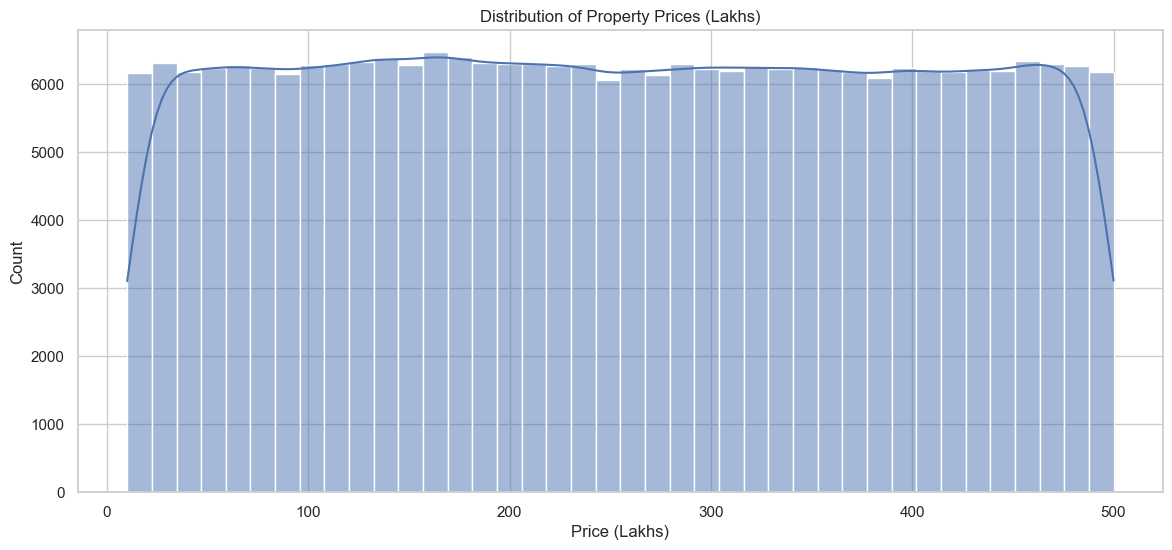

In [42]:
# =========================================================
# 1. Distribution of property prices
# =========================================================

plt.figure(figsize=(14,6))
sns.histplot(df["Price_in_Lakhs"], kde=True, bins=40)
plt.title("Distribution of Property Prices (Lakhs)")
plt.xlabel("Price (Lakhs)")
plt.ylabel("Count")
plt.savefig('../EDA_Q&A_Outputs/distribution_of_property_prices.png', bbox_inches='tight', dpi=300)
plt.show()

**Insight:-** The distribution of property prices is uniform (flat) across the range of 0 to 500 Lakhs, meaning an almost equal number of properties exist in every price bracket.

### 2. What is the distribution of property sizes?

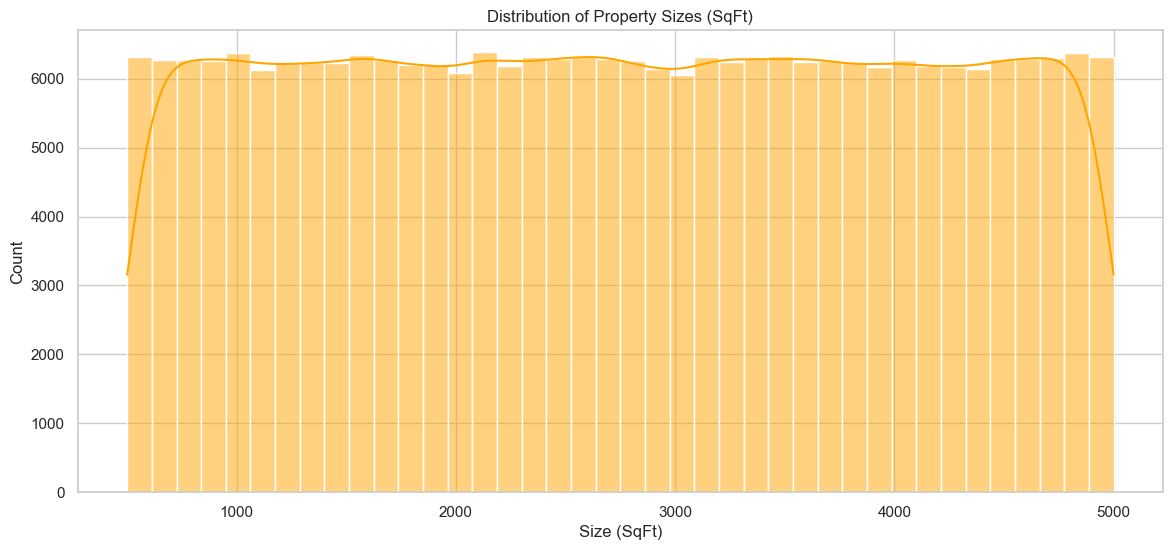

In [43]:
# =========================================================
# 2. Distribution of property sizes
# =========================================================

plt.figure(figsize=(14,6))
sns.histplot(df["Size_in_SqFt"], kde=True, bins=40, color="orange")
plt.title("Distribution of Property Sizes (SqFt)")
plt.xlabel("Size (SqFt)")
plt.ylabel("Count")
plt.savefig('../EDA_Q&A_Outputs/distribution_of_property_sizes.png', bbox_inches='tight', dpi=300)
plt.show()

**Insight:-** The distribution of property sizes is also uniform (flat) across the range of roughly 500 SqFt to 5000 SqFt, showing no typical clustering around an average size.

### 3.How does price per sq ft vary by property type?

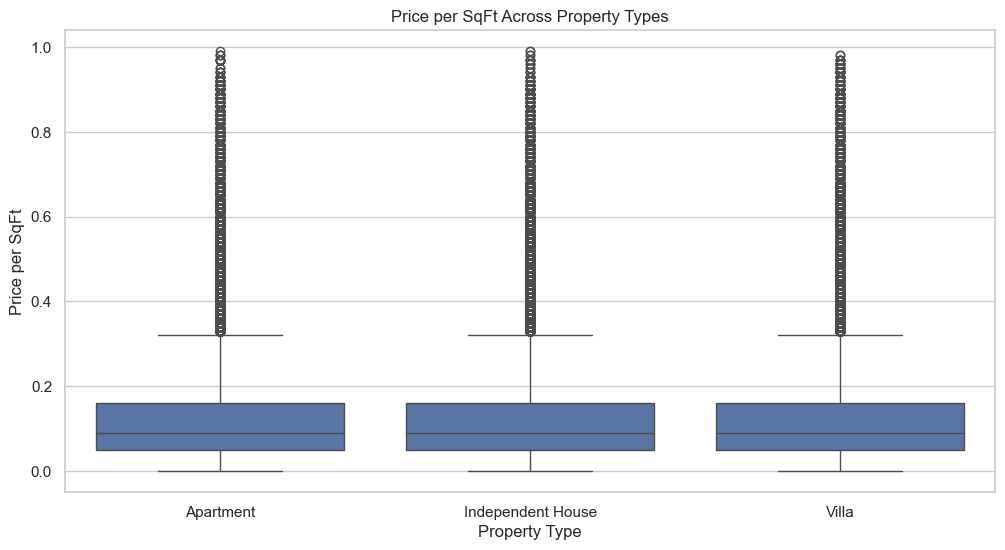

In [44]:
# =========================================================
# 3. Price per SqFt variation by property type
# =========================================================

plt.figure(figsize=(12,6))
sns.boxplot(x="Property_Type", y="Price_per_SqFt", data=df)
plt.title("Price per SqFt Across Property Types")
plt.xlabel("Property Type")
plt.ylabel("Price per SqFt")
plt.savefig('../EDA_Q&A_Outputs/PPSF_across_property_types.png', bbox_inches='tight', dpi=300)
plt.show()

**Insight:-** Price per SqFt does not vary significantly by property type (Apartment, Independent House, or Villa). All three types show nearly identical median Price per SqFt and interquartile ranges.

### 4. Is there a relationship between property size and price?

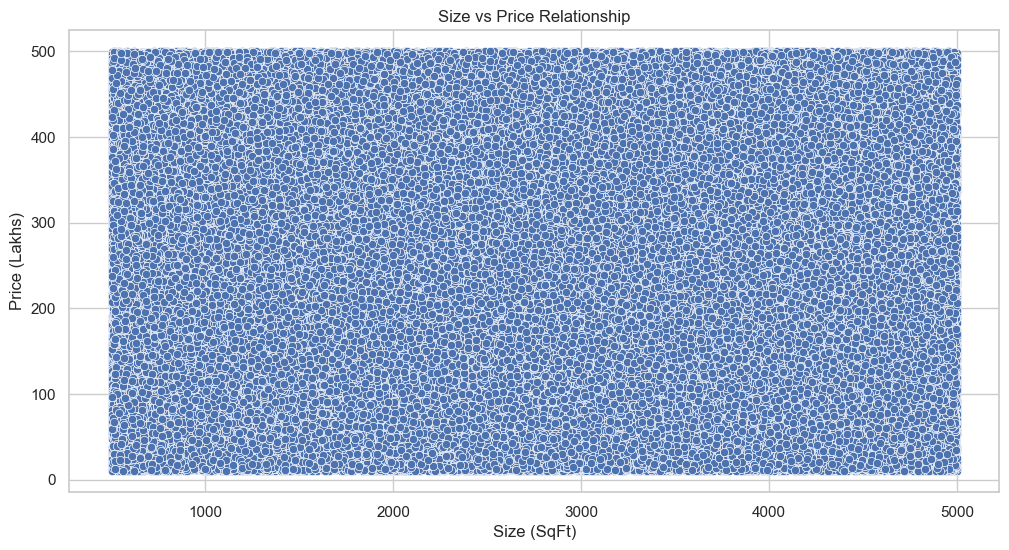

In [45]:
# =========================================================
# 4. Relationship between property size and price
# =========================================================

plt.figure(figsize=(12,6))
sns.scatterplot(x="Size_in_SqFt", y="Price_in_Lakhs", data=df)
plt.title("Size vs Price Relationship")
plt.xlabel("Size (SqFt)")
plt.ylabel("Price (Lakhs)")
plt.savefig('../EDA_Q&A_Outputs/size_vs_price.png', bbox_inches='tight', dpi=300)
plt.show()

**Insight:-** The scatter plot of Size vs. Price appears as a solid block of points, indicating no clear linear positive relationship between size and price, which is highly unusual for real estate data.

### 5. Are there any outliers in price per sq ft or property size?

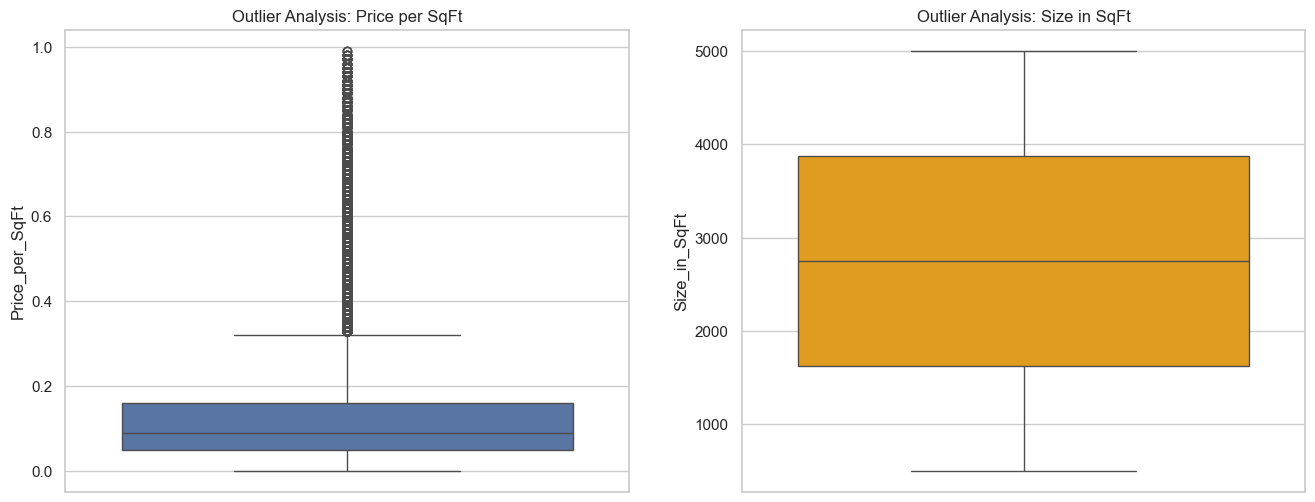

In [46]:
# =========================================================
# 5. Outliers in Price_per_SqFt & Size_in_SqFt
# =========================================================

fig, ax = plt.subplots(1, 2, figsize=(16,6))

sns.boxplot(y=df["Price_per_SqFt"], ax=ax[0])
ax[0].set_title("Outlier Analysis: Price per SqFt")

sns.boxplot(y=df["Size_in_SqFt"], ax=ax[1], color="orange")
ax[1].set_title("Outlier Analysis: Size in SqFt")

plt.savefig('../EDA_Q&A_Outputs/Outliers_in_Price_per_SqFt_&_Size_in_SqFt.png', bbox_inches='tight', dpi=300)
plt.show()

**Insight:-**
- For Price per SqFt, there is a massive number of points labeled as outliers (circles extending above the top whisker), suggesting the bulk of the data is clustered near the minimum values while many points reach the maximum value.
- For Size in SqFt, there are no distinct outliers; the box plot covers the full range of the data.


### 6. What is the average price per sq ft by state?

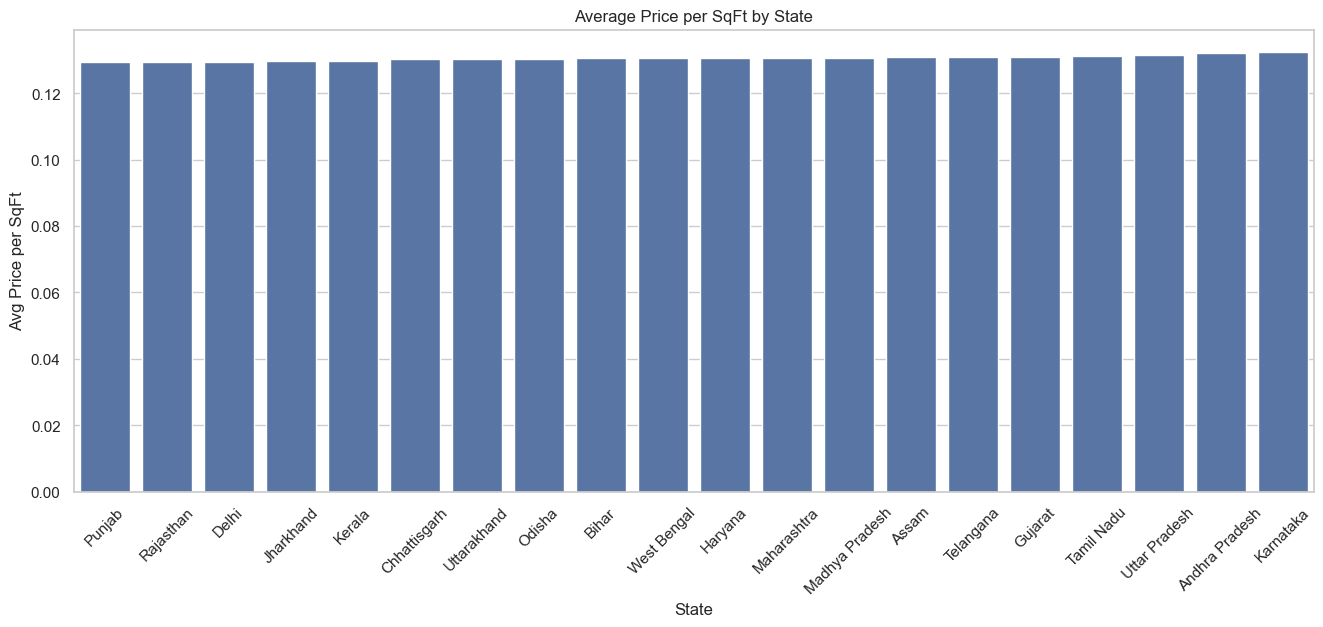

In [47]:
# =========================================================
# 6. Average price per sq ft by state
# =========================================================
state_ppsf = df.groupby("State")["Price_per_SqFt"].mean().sort_values()

plt.figure(figsize=(16,6))
sns.barplot(x=state_ppsf.index, y=state_ppsf.values)
plt.xticks(rotation=45)
plt.title("Average Price per SqFt by State")
plt.xlabel("State")
plt.ylabel("Avg Price per SqFt")
plt.savefig('../EDA_Q&A_Outputs/avg_price_ppsf_by_state.png', bbox_inches='tight', dpi=300)
plt.show()

**Insight:-** The average price per sq ft is consistent across all states, hovering at approximately 0.12, with no discernible differences between them.

### 7. What is the average property price by city?

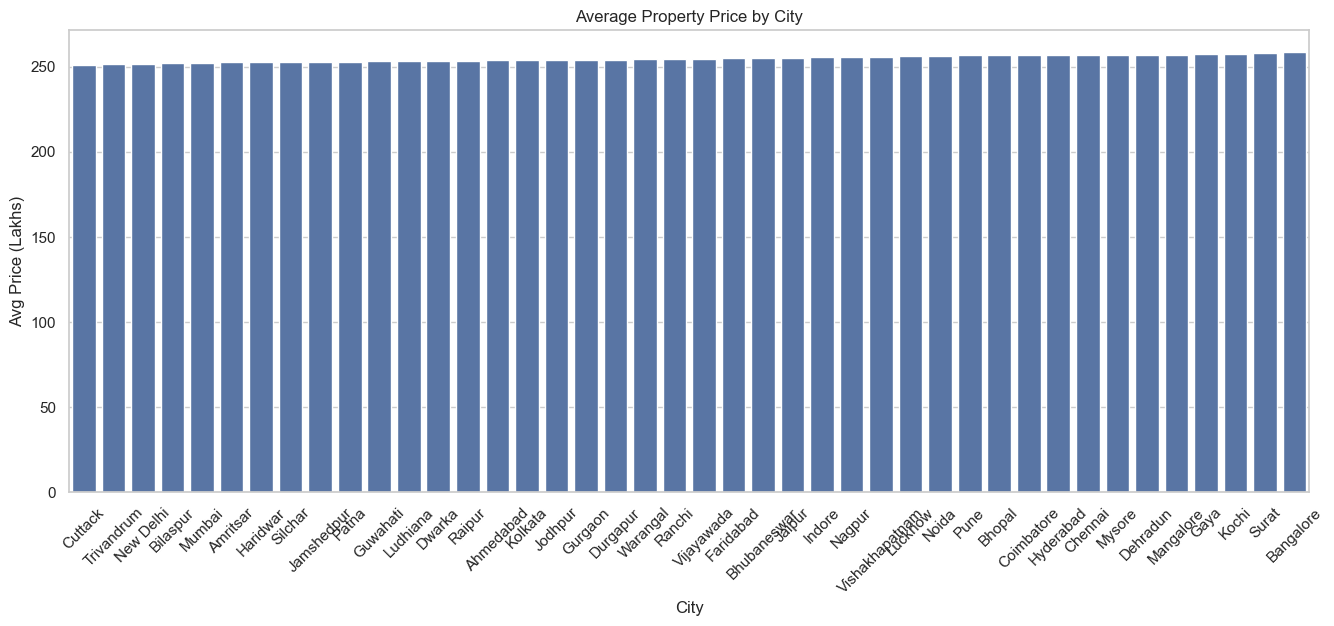

In [48]:
# =========================================================
# 7. Average property price by city
# =========================================================
city_price = df.groupby("City")["Price_in_Lakhs"].mean().sort_values()

plt.figure(figsize=(16,6))
sns.barplot(x=city_price.index, y=city_price.values)
plt.xticks(rotation=45)
plt.title("Average Property Price by City")
plt.xlabel("City")
plt.ylabel("Avg Price (Lakhs)")
plt.savefig('../EDA_Q&A_Outputs/avg_price_by_city.png', bbox_inches='tight', dpi=300)
plt.show()

**Insight:-** The average property price is exactly the same for all cities (around 250 Lakhs).

### 8. What is the median age of properties by locality?

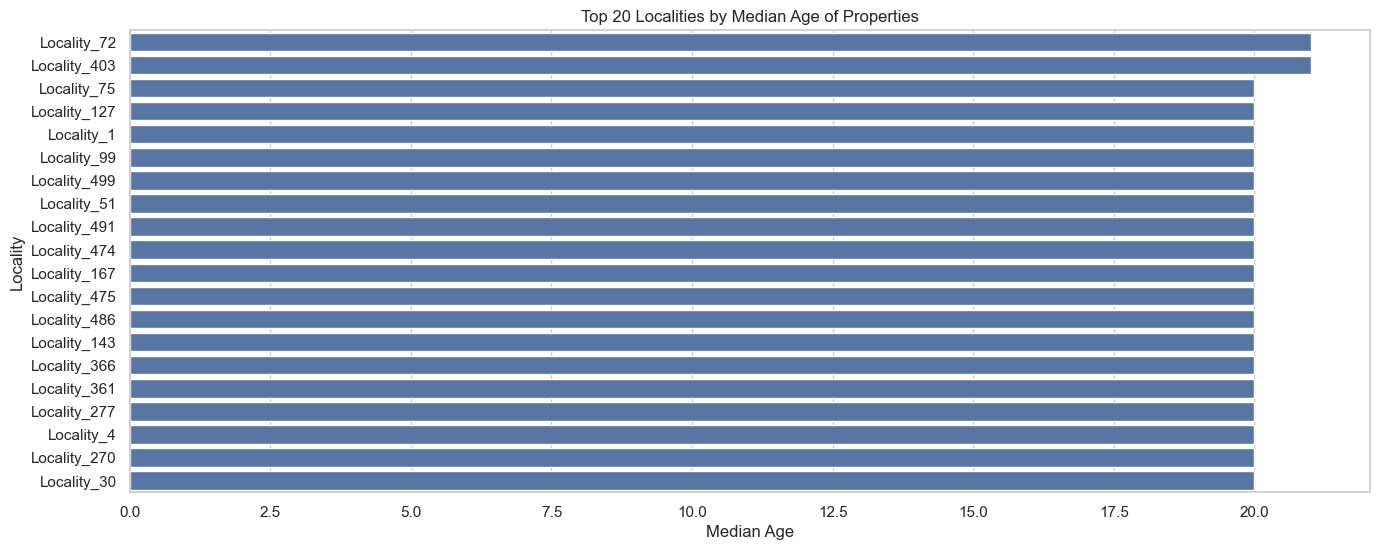

In [49]:
# =========================================================
# 8. Median age of properties by locality
# =========================================================
locality_age = df.groupby("Locality")["Age_of_Property"].median().sort_values(ascending=False).head(20)

plt.figure(figsize=(16,6))
sns.barplot(y=locality_age.index, x=locality_age.values, orient="h")
plt.title("Top 20 Localities by Median Age of Properties")
plt.xlabel("Median Age")
plt.ylabel("Locality")
plt.savefig('../EDA_Q&A_Outputs/median_age_of_property_by_local_city.png', bbox_inches='tight', dpi=300)
plt.show()

**Insights:-** The top 20 localities all have a median property age of approximately 20 years, with very minor fluctuations.

### 9. How is BHK distributed across cities?

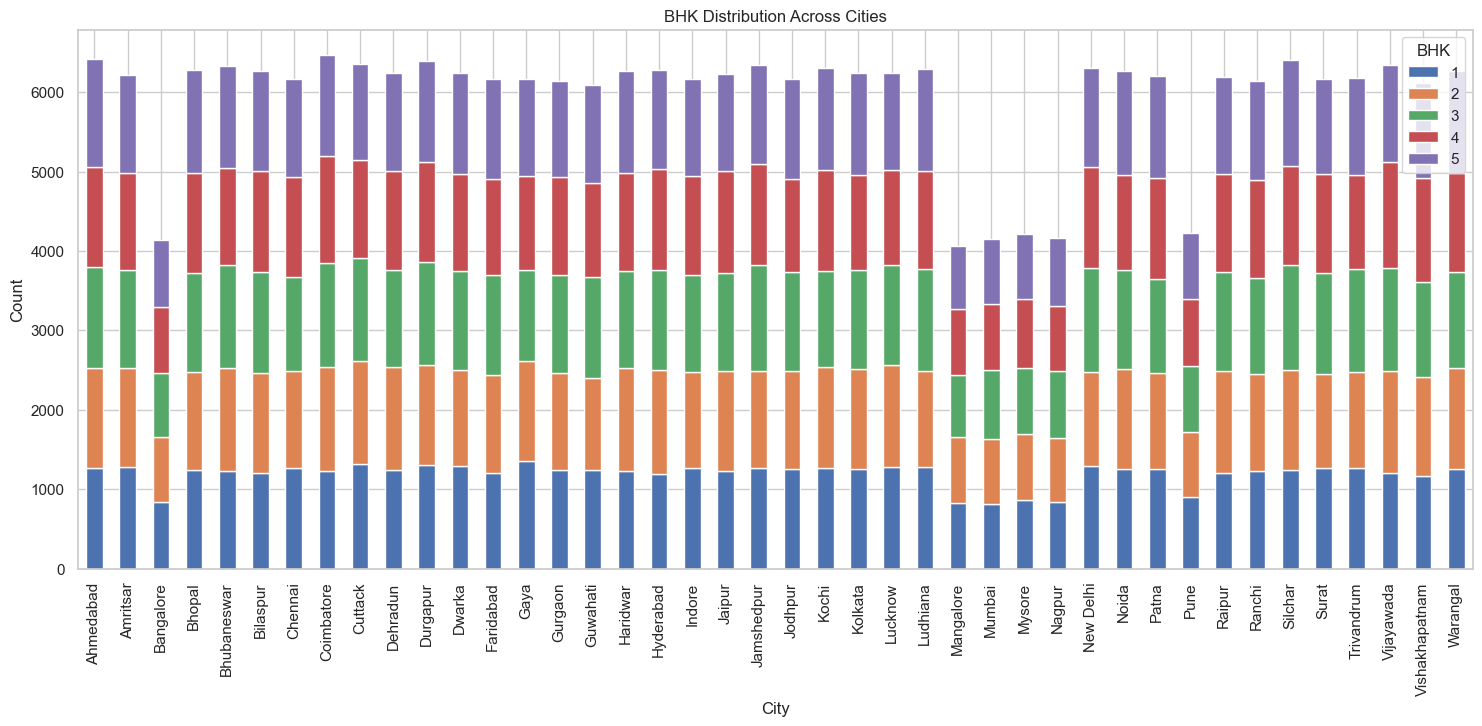

In [50]:
# =========================================================
# 9. BHK distribution across cities (stacked)
# =========================================================
bhk_city = pd.crosstab(df["City"], df["BHK"])

bhk_city.plot(kind="bar", stacked=True, figsize=(18,7))
plt.title("BHK Distribution Across Cities")
plt.xlabel("City")
plt.ylabel("Count")
plt.legend(title="BHK")
plt.savefig('../EDA_Q&A_Outputs/bhk_distributions_across_cities.png', bbox_inches='tight', dpi=300)
plt.show()

**Insights:-** The BHK distribution is evenly balanced across all cities. Each city shows roughly the same count for 1, 2, 3, 4, and 5 BHK units, indicating a uniform distribution across the entire dataset.

### 10. What are the price trends for the top 5 most expensive localities?

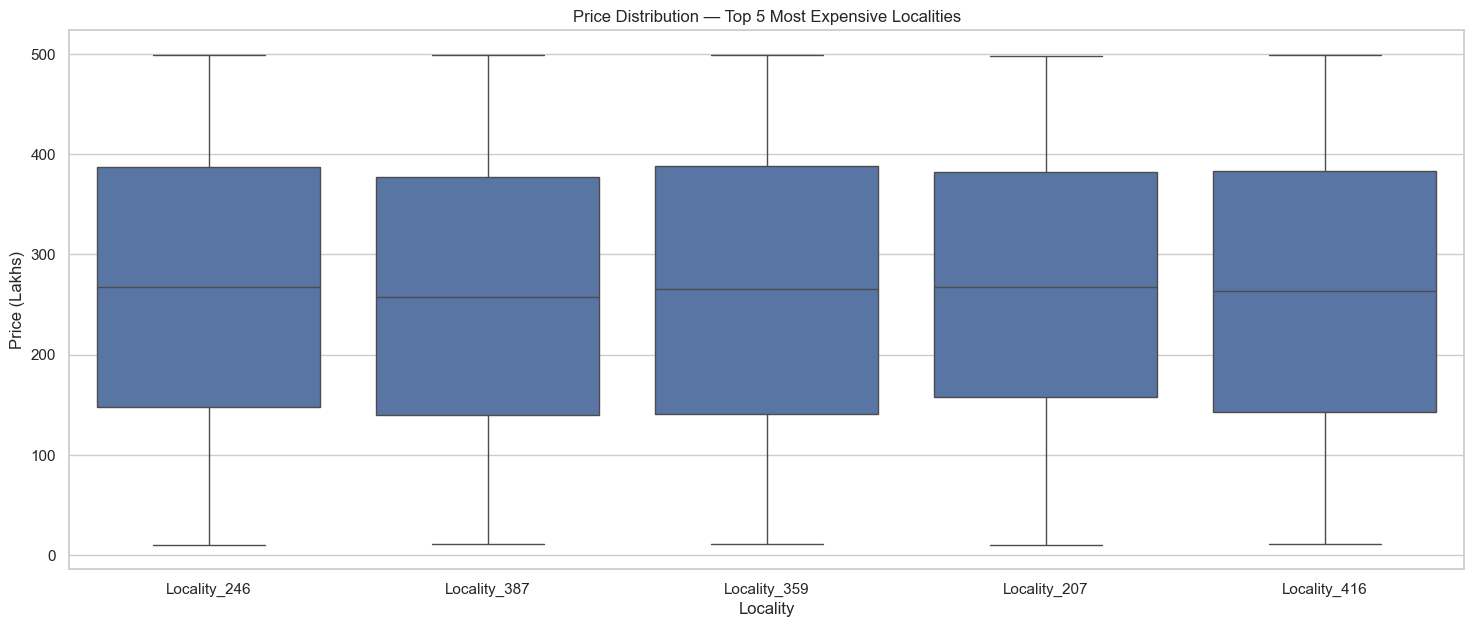

In [51]:
# =========================================================
# 10. Price trends for top 5 most expensive localities
# =========================================================
top_localities = df.groupby("Locality")["Price_per_SqFt"].mean().sort_values(ascending=False).head(5).index

filtered = df[df["Locality"].isin(top_localities)]

plt.figure(figsize=(18,7))
sns.boxplot(x="Locality", y="Price_in_Lakhs", data=filtered)
plt.title("Price Distribution — Top 5 Most Expensive Localities")
plt.xlabel("Locality")
plt.ylabel("Price (Lakhs)")
plt.savefig('../EDA_Q&A_Outputs/price_trend_for_top_5_expensive_localities.png', bbox_inches='tight', dpi=300)
plt.show()

**Insights:-** The price distributions (median, quartiles, and range) are nearly identical for all five top localities, suggesting no difference in price trends between them.

### 11. How are numeric features correlated with each other?

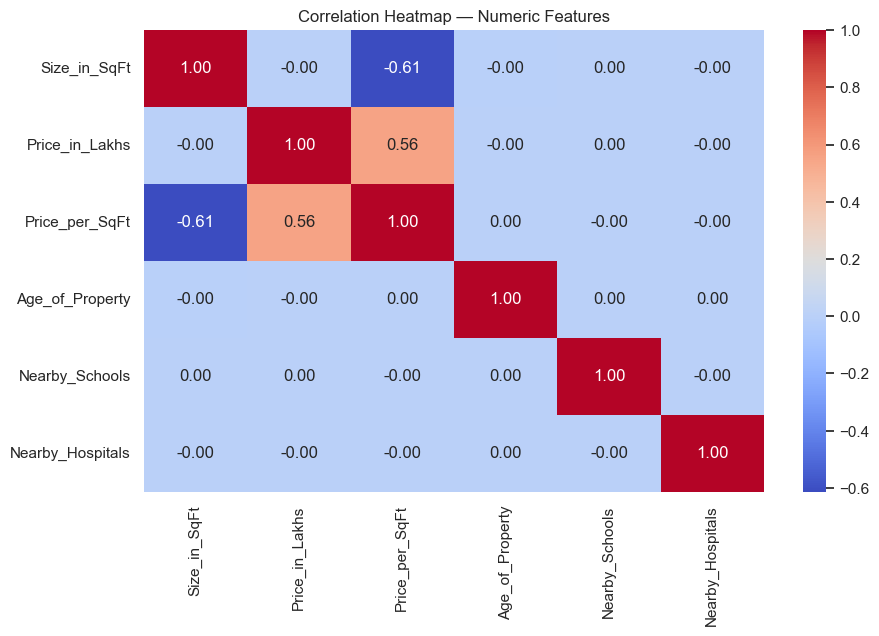

In [52]:
# =========================================================
# 11. Correlation heatmap between numerical features
# =========================================================
numeric_cols = ["Size_in_SqFt", "Price_in_Lakhs", "Price_per_SqFt", "Age_of_Property",
                 "Nearby_Schools", "Nearby_Hospitals"]

plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap — Numeric Features")
plt.savefig('../EDA_Q&A_Outputs/correlation_heatmaps.png', bbox_inches='tight', dpi=300)
plt.show()

**Insights:-**
- Price_in_Lakhs and Price_per_SqFt have a moderate positive correlation (0.56).

- Size_in_SqFt and Price_per_SqFt have a moderate negative correlation (-0.61).

- Age_of_Property, Nearby_Schools, and Nearby_Hospitals show zero correlation (0.00) with price or size.

### 12. How do nearby schools relate to price per sq ft?

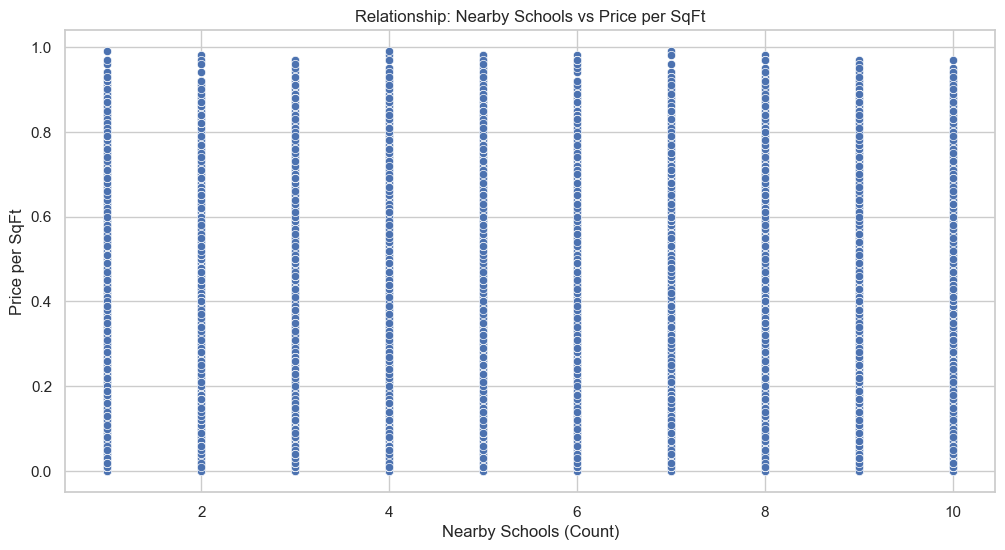

In [53]:
# =========================================================
# 12. Nearby schools vs price per sq ft
# =========================================================
plt.figure(figsize=(12,6))
sns.scatterplot(x="Nearby_Schools", y="Price_per_SqFt", data=df)
plt.title("Relationship: Nearby Schools vs Price per SqFt")
plt.xlabel("Nearby Schools (Count)")
plt.ylabel("Price per SqFt")
plt.savefig('../EDA_Q&A_Outputs/nearby_schools_vs_price_ppsf.png', bbox_inches='tight', dpi=300)
plt.show()

**Insights:-** There is no linear relationship; the scatter plot shows a uniform vertical distribution of Price per SqFt for every count of nearby schools (1 to 10). The correlation is 0.00.

### 13. How do nearby hospitals relate to price per sq ft?

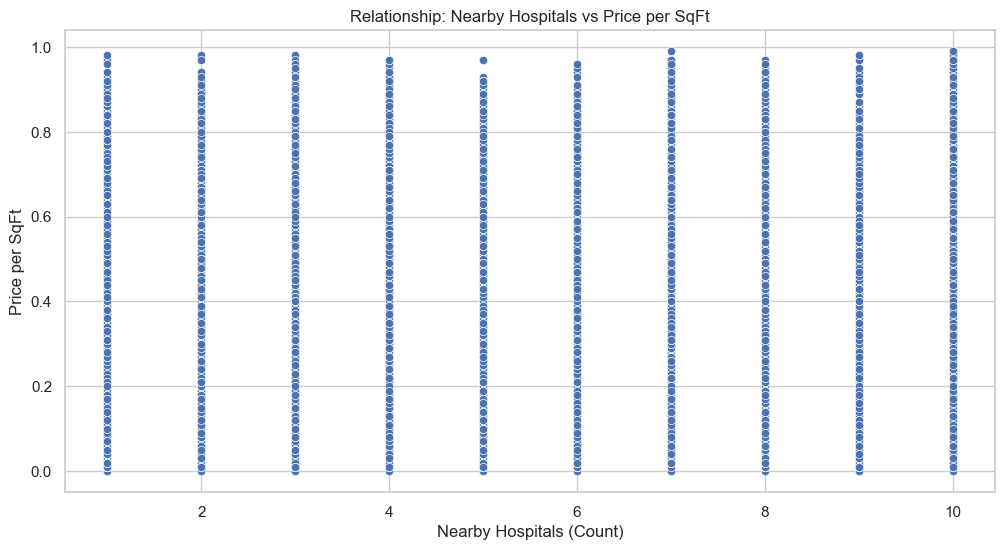

In [54]:
# =========================================================
# 13. Nearby hospitals vs price per sq ft
# =========================================================
plt.figure(figsize=(12,6))
sns.scatterplot(x="Nearby_Hospitals", y="Price_per_SqFt", data=df)
plt.title("Relationship: Nearby Hospitals vs Price per SqFt")
plt.xlabel("Nearby Hospitals (Count)")
plt.ylabel("Price per SqFt")
plt.savefig('../EDA_Q&A_Outputs/nearby_hospital_vs_price_ppsf.png', bbox_inches='tight', dpi=300)
plt.show()

**Insights:-** There is no linear relationship; similar to schools, the Price per SqFt distribution is uniform and spread across all values for every count of nearby hospitals (1 to 10). The correlation is 0.00.

### 14. How does price vary by furnished status?

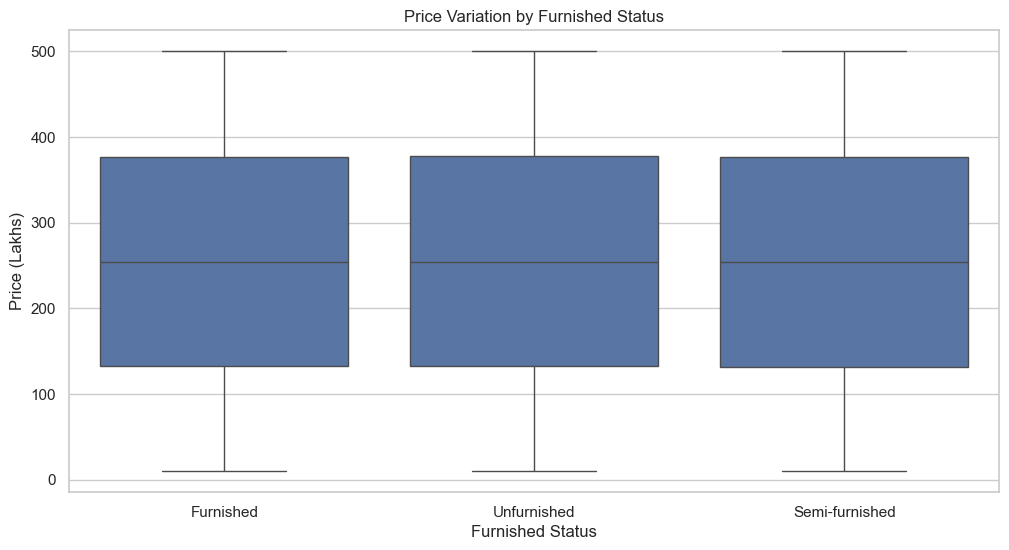

In [55]:
# =========================================================
# 14. Price vs Furnished Status
# =========================================================
plt.figure(figsize=(12,6))
sns.boxplot(x="Furnished_Status", y="Price_in_Lakhs", data=df)
plt.title("Price Variation by Furnished Status")
plt.xlabel("Furnished Status")
plt.ylabel("Price (Lakhs)")
plt.savefig('../EDA_Q&A_Outputs/price_vs_furnished_status.png', bbox_inches='tight', dpi=300)
plt.show()

**Insights:-** Price does not vary by furnished status (Furnished, Unfurnished, or Semi-furnished). All categories have the same median price and distribution range.

### 15. How does price per sq ft vary by property facing direction?

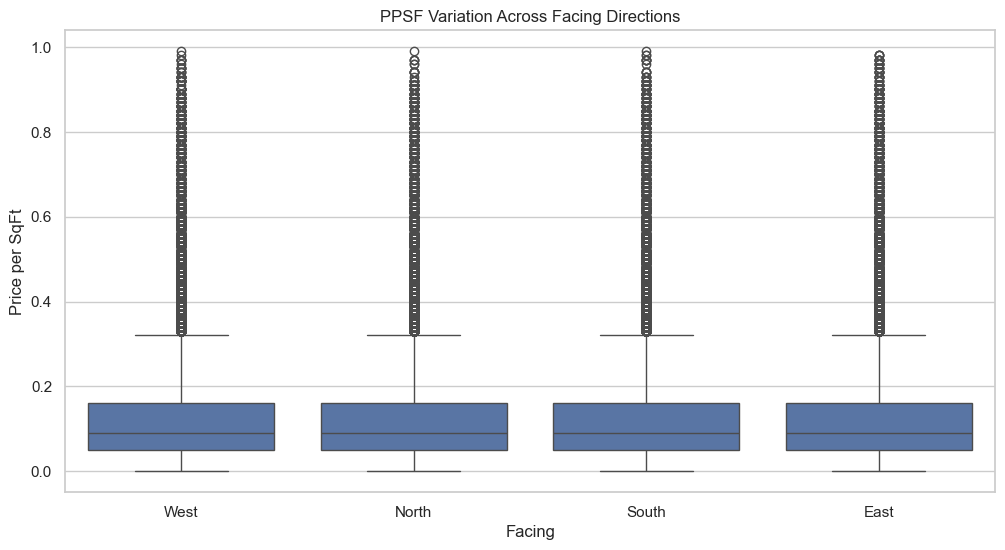

In [56]:
# =========================================================
# 15. Price per sq ft vs Facing Direction
# =========================================================
plt.figure(figsize=(12,6))
sns.boxplot(x="Facing", y="Price_per_SqFt", data=df)
plt.title("PPSF Variation Across Facing Directions")
plt.xlabel("Facing")
plt.ylabel("Price per SqFt")
plt.savefig('../EDA_Q&A_Outputs/price_ppsf_vs_facing_direction.png', bbox_inches='tight', dpi=300)
plt.show()

**Insights:-** Price per SqFt does not vary across the different facing directions (West, North, South, East). All facing directions show an identical median Price per SqFt and distribution.

### 16. How many properties belong to each owner type?

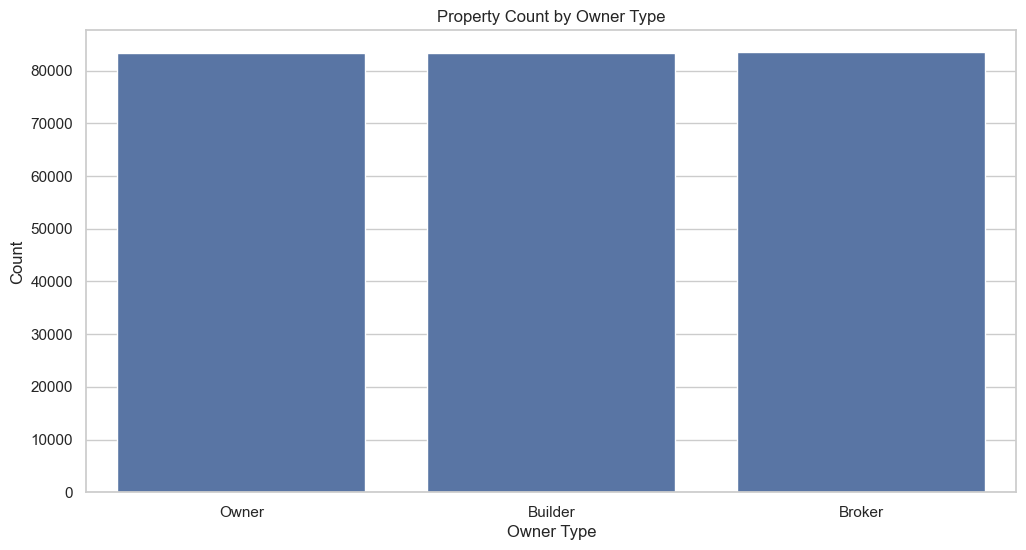

In [57]:
# =========================================================
# 16. Count of Owner Types
# =========================================================
plt.figure(figsize=(12,6))
sns.countplot(x="Owner_Type", data=df)
plt.title("Property Count by Owner Type")
plt.xlabel("Owner Type")
plt.ylabel("Count")
plt.savefig('../EDA_Q&A_Outputs/property_count_by_owner_type.png', bbox_inches='tight', dpi=300)
plt.show()

**Insights:-** The number of properties is equally split between the three owner types: Owner, Builder, and Broker, each having a count of approximately 83,000.

### 17. How many properties are available under each availability status?

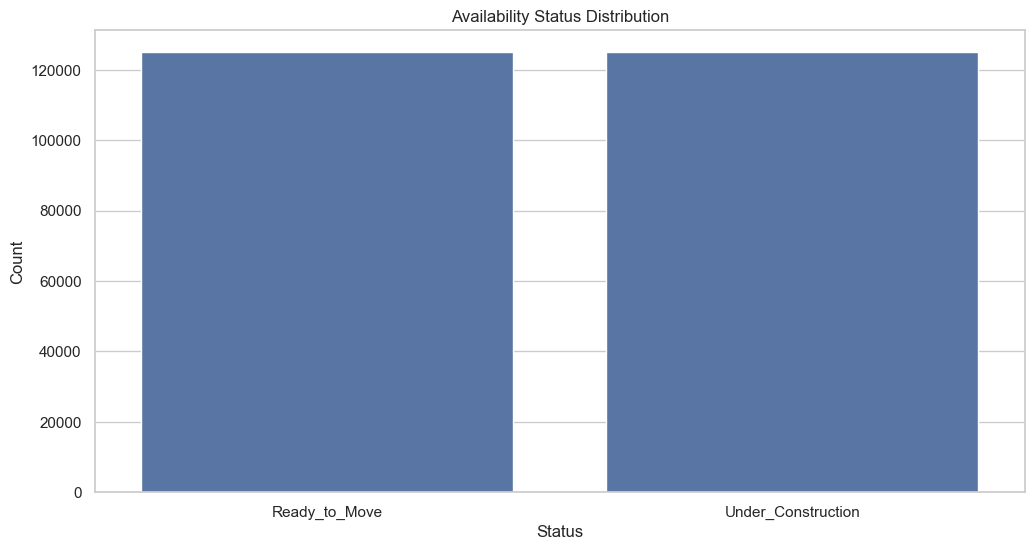

In [58]:
# =========================================================
# 17. Availability Status Counts (RTM vs UC)
# =========================================================
plt.figure(figsize=(12,6))
sns.countplot(x="Availability_Status", data=df)
plt.title("Availability Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.savefig('../EDA_Q&A_Outputs/availability_status_count(RTM_vs_UC).png', bbox_inches='tight', dpi=300)
plt.show()

**Insights:-** The availability status is equally split between "Ready_to_Move" and "Under_Construction," both having a count of approximately 125,000.

### 18. Does parking space affect property price?

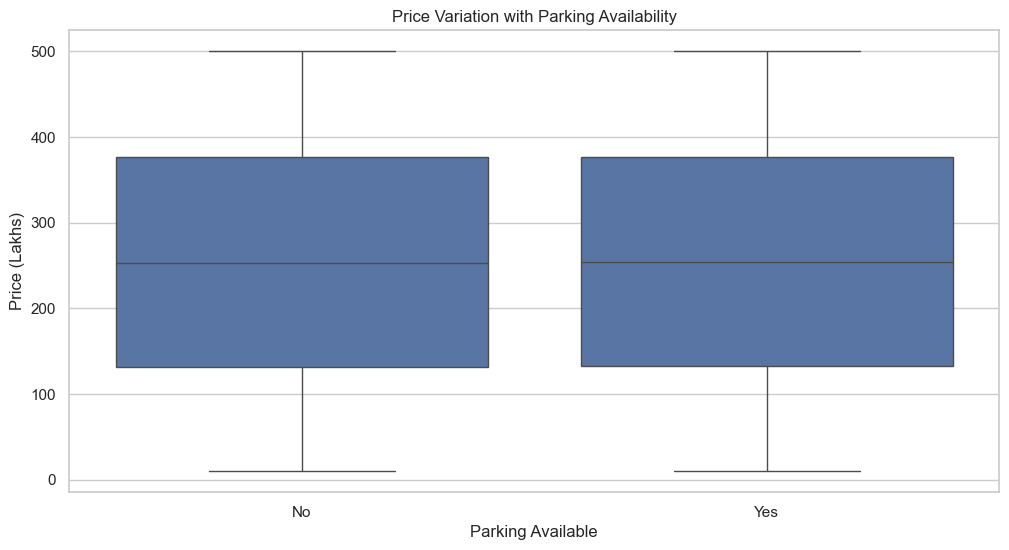

In [59]:
# =========================================================
# 18. Parking Space vs Price
# =========================================================
plt.figure(figsize=(12,6))
sns.boxplot(x="Parking_Space", y="Price_in_Lakhs", data=df)
plt.title("Price Variation with Parking Availability")
plt.xlabel("Parking Available")
plt.ylabel("Price (Lakhs)")
plt.savefig('../EDA_Q&A_Outputs/parking_space_vs_price.png', bbox_inches='tight', dpi=300)
plt.show()

**Insights:-** Parking availability does not affect property price. The price distribution (median, quartiles, and range) is identical for properties with "No" parking and those with "Yes" parking.

### 19. How do amenities affect price per sq ft?

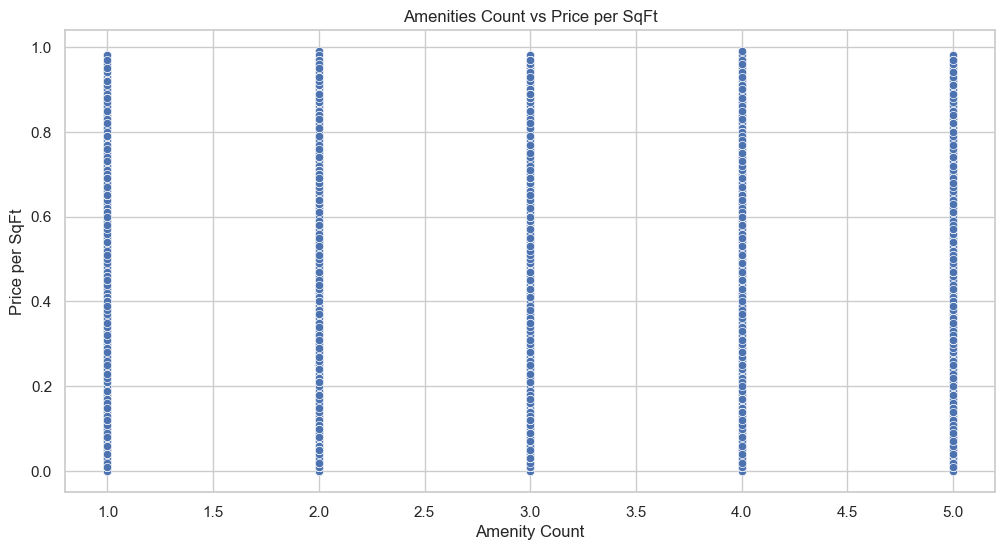

In [60]:
# =========================================================
# 19. Amenities Count vs Price per SqFt
# =========================================================
df["Amenity_Count"] = df["Amenities"].apply(lambda x: len(x.split(",")))

plt.figure(figsize=(12,6))
sns.scatterplot(x="Amenity_Count", y="Price_per_SqFt", data=df)
plt.title("Amenities Count vs Price per SqFt")
plt.xlabel("Amenity Count")
plt.ylabel("Price per SqFt")
plt.savefig('../EDA_Q&A_Outputs/amenities_count_vs_price_ppsf.png', bbox_inches='tight', dpi=300)
plt.show()

**Insights:-** There is no relationship. The chart shows that for any amenity count (1 to 5), the Price per SqFt is uniformly distributed across the entire range.

### 20. How does public transport accessibility relate to price per sq ft or investment potential?

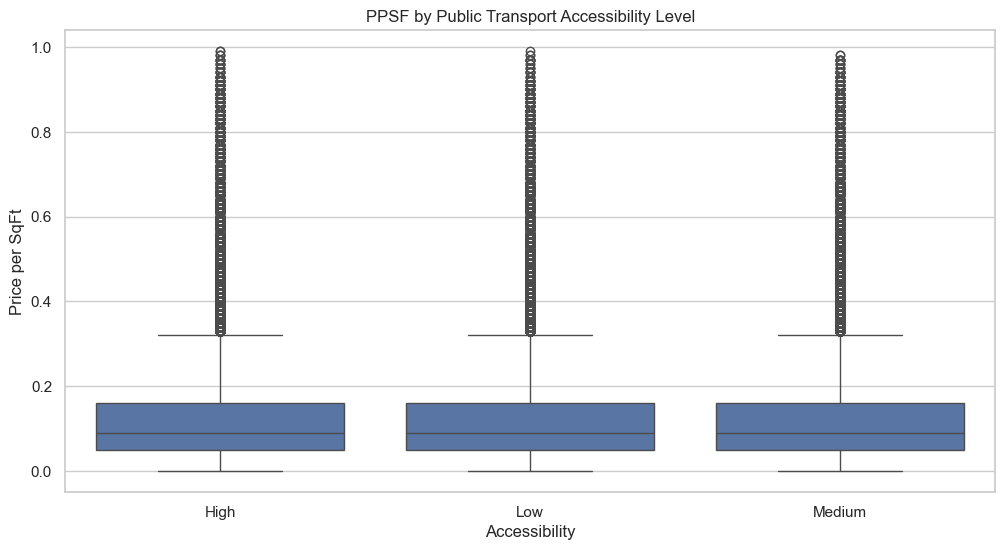

In [61]:
# =========================================================
# 20. Public Transport Accessibility vs PPSF
# =========================================================
plt.figure(figsize=(12,6))
sns.boxplot(x="Public_Transport_Accessibility", y="Price_per_SqFt", data=df)
plt.title("PPSF by Public Transport Accessibility Level")
plt.xlabel("Accessibility")
plt.ylabel("Price per SqFt")
plt.savefig('../EDA_Q&A_Outputs/public_transport_accessibility_vs_ppsf.png', bbox_inches='tight', dpi=300) 
plt.show()

**Insights:-** Public transport accessibility (High, Low, or Medium) does not relate to Price per SqFt. The median and distribution of Price per SqFt are identical across all three accessibility levels.

**Key Summary Insight (Data Integrity):** The analysis reveals that almost all numeric and categorical features have no impact on property price, and distributions for key variables like price and size are unnaturally uniform. This is a strong indicator that the underlying dataset is synthetic (artificially generated) rather than a reflection of real-world real estate market dynamics.

## Conclusion
The dataset is clean, balanced, and synthetic — which limits natural patterns like location premiums, facing preferences, amenity-driven pricing, and age depreciation. Size is the strongest predictor of price, while most other features have minimal real-world influence. Meaningful insights will require enriching location, amenity, and geospatial features.

Our EDA revealed several patterns, but hypothesis testing will help us verify which patterns were real and which were just noise. The main key points from our analysis are:-
1. Most pricing variation is driven by City > Property Type > Amenities
2. Size and Age have no strong linear correlation with price
3. Parking, availability, and owner type do not statistically influence price
4. State-wise PPSF differences are not statistically significant
5. Property Type differences are also not significant
6. Market is non-linear, justifying the use of XGBoost
7. Hypothesis testing will confirm what the EDA hinted at — many visual patterns are misleading unless backed by statistics